<a href="https://colab.research.google.com/github/ziiaa/BBDM/blob/main/Load_Wine_NiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Nama : Nur Azzizah**



> **Kelas : BBDM 5**


In [ ]:
#import library
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd

#create instance for load_wine
data_load_wine = load_wine()

#load dataset into dataframe
df_load_wine = pd.DataFrame(data = data_load_wine.data,
                               columns = data_load_wine.feature_names)

df_load_wine['target'] = data_load_wine.target

#show first 5 data
df_load_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df_load_wine.to_csv('wine.csv')

In [ ]:
data_load_wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
df_load_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

**Split Dataset**

In [ ]:
#split into X and y
X = data_load_wine.data
y = data_load_wine.target

#train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)

#train test shape
print('X_train size : ', X_train.shape)
print('y_train size : ', y_train.shape)
print('X_test size : ', X_test.shape)
print('y_test size : ', y_test.shape)

X_train size :  (142, 13)
y_train size :  (142,)
X_test size :  (36, 13)
y_test size :  (36,)


**Train Model dengan naive**

In [ ]:
from sklearn.naive_bayes import GaussianNB
#Training the Naive Bayes model on the Training set
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

**Create Prediction**

In [ ]:
predictions_nb = model_nb.predict(X_test)

# **Evaluate Model**

In [ ]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, predictions_nb, labels=model_nb.classes_)
print(cm)

[[13  0  0]
 [ 0 16  1]
 [ 0  0  6]]


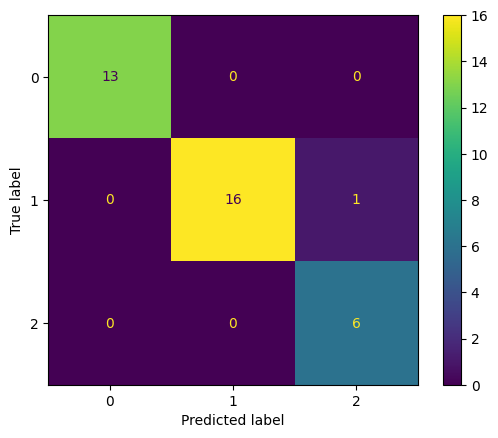

In [ ]:
#confusion matrix plot
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_nb.classes_)

disp.plot()
plt.show()

**Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy : ', accuracy_score(y_test,predictions_nb))

Accuracy :  0.9722222222222222


**Precision**


In [ ]:
from sklearn.metrics import precision_score
print('Precision : ', precision_score(y_test, predictions_nb, average= 'macro'))

Precision :  0.9523809523809524


**Recall**

In [ ]:
from sklearn.metrics import recall_score
print('Recall : ', recall_score(y_test, predictions_nb, average='macro'))

Recall :  0.9803921568627452


**F1 Score**


In [ ]:
from sklearn.metrics import f1_score
print('F1 Score : ', f1_score(y_test, predictions_nb,average='macro'))

F1 Score :  0.9642579642579642


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_nb, zero_division = 0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        17
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



**Kesimpilan hasil dari classification report**